# Fashion Mnist 数据集分类

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *
plt.rcParams['font.family'] = 'SimHei'

## 数据集结构

### 训练集包含600000张28x28像素的图片，以及标签值 

In [2]:
train = pd.read_csv("./dataset/fashion-mnist_train.csv")

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 测试集包含100000张28x28像素的图片，以及标签值 

In [4]:
test = pd.read_csv("./dataset/fashion-mnist_test.csv")

In [5]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = load_data(train,test)

In [7]:
train_images.shape,train_labels.shape

((60000, 784), (60000,))

In [8]:
train_images,train_labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([2, 9, 6, ..., 8, 8, 7], dtype=uint8))

In [9]:
class_names = [' T恤', '裤子', '套衫', '连衣裙', '外套','凉鞋', '衬衫', '运动鞋', '包', '踝靴']

In [13]:
train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

## 数据集部分可视化

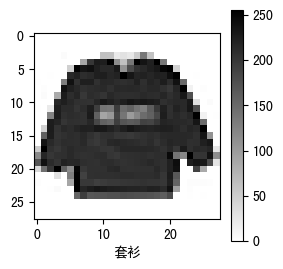

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)

### 归一化预处理

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

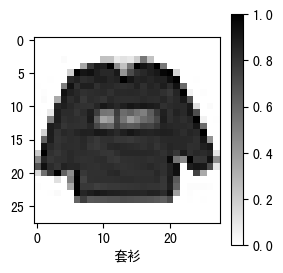

In [16]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)

## 显示训练集中的前25张图像

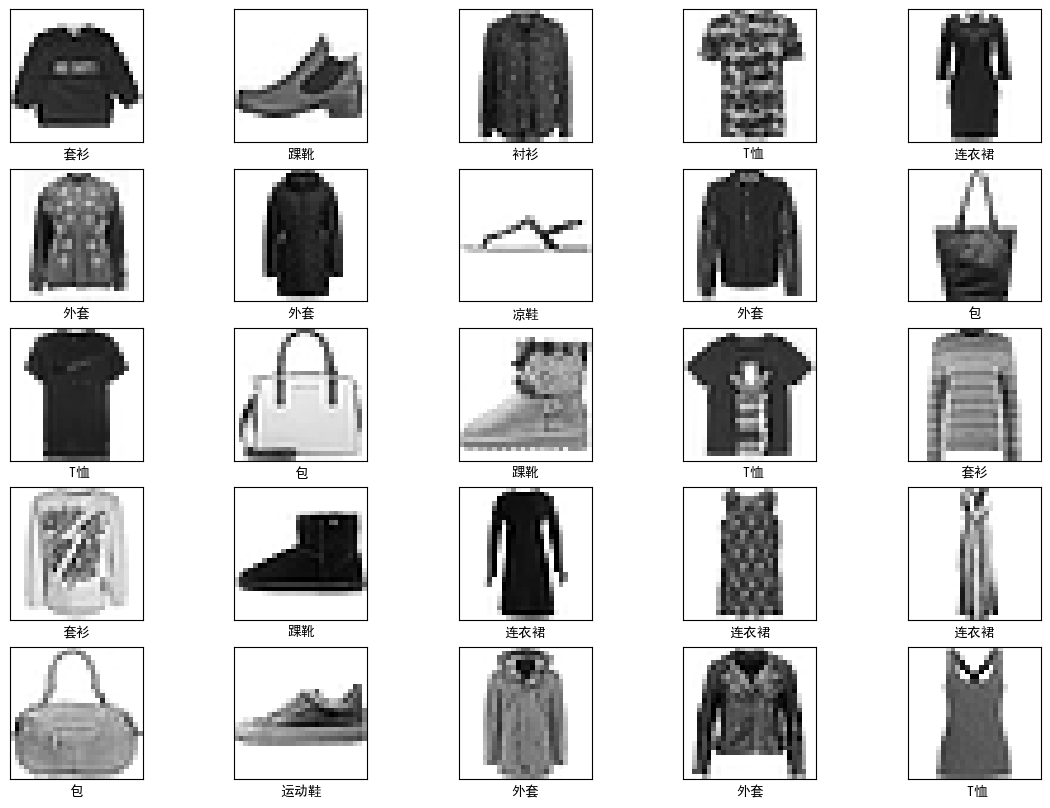

In [ ]:
plt.figure(figsize=(14,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## 可结合下面的标签及分类表进行查看

In [18]:
train_labels[:25]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8, 0, 8, 9, 0, 2, 2, 9, 3, 3, 3, 8, 7,
       4, 4, 0], dtype=uint8)

In [20]:
class_names

[' T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '踝靴']